<a href="https://colab.research.google.com/github/ahmadshajhan/Ahmad/blob/main/cv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

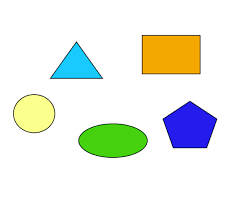

In [42]:
import cv2
from google.colab.patches import cv2_imshow

# Path to your image
img_path = "/content/images.png"

# Read image
img = cv2.imread(img_path)

# Check if loaded
if img is None:
    print("Image not found. Check the path!")
else:
    # OpenCV reads in BGR → convert to RGB (optional, for correct colors)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Show image in Colab
    cv2_imshow(img_rgb)


In [43]:
import matplotlib.pyplot as plt
import numpy as np

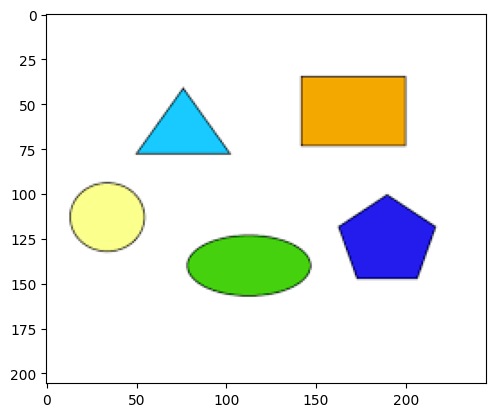

In [44]:
plt.imshow(img)

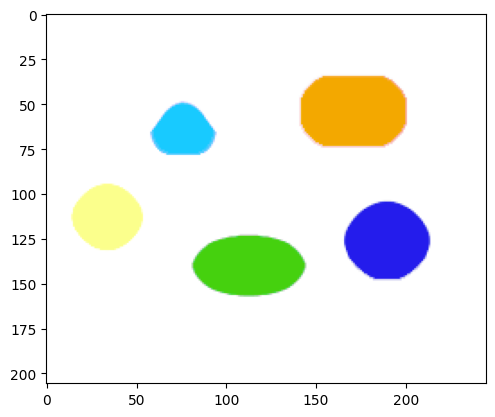

In [45]:
image_blur = cv2.medianBlur(img, 25)
plt.imshow(image_blur)


In [46]:
from matplotlib import image
#Gray Scale
image_gray = cv2.cvtColor(image_blur, cv2.COLOR_BGR2GRAY)

In [47]:
image_res, image_thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY_INV)

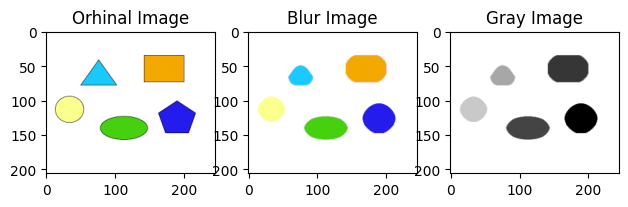

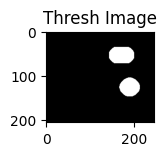

In [48]:
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.title("Orhinal Image")
plt.imshow(img, cmap='gray')
plt.subplot(1,4,2)
plt.title("Blur Image")
plt.imshow(image_blur, cmap='gray')
plt.subplot(1,4,3)
plt.title("Gray Image")
plt.imshow(image_gray, cmap='gray')
plt.show()
plt.subplot(1,4,4)
plt.title("Thresh Image")
plt.imshow(image_thresh, cmap='gray')
plt.show()

In [49]:
countours, hierarchy = cv2.findContours(image_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

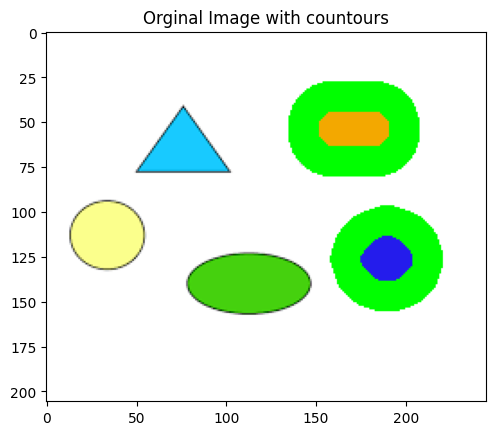

In [50]:
cv2.drawContours(img, countours, -1, (0,255,0), 15)
plt.title("Orginal Image with countours")
plt.imshow(img, cmap='gray')

In [51]:
number_of_image_in_image = len(countours)
print("Number of images in image: ", number_of_image_in_image)

TypeError: 'int' object is not callable

In [52]:
kernal = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(image_thresh, cv2.MORPH_OPEN, kernal)

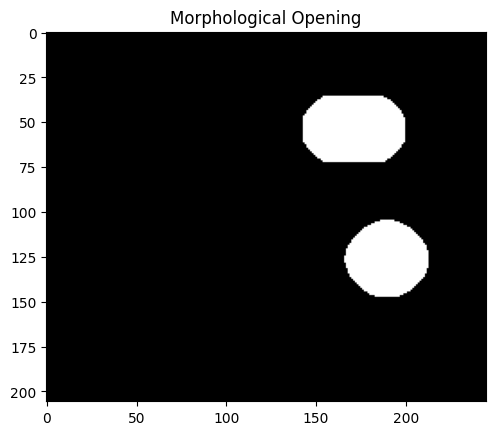

In [53]:
plt.title("Morphological Opening")
plt.imshow(opening, cmap='gray')
plt.show()

In [54]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)

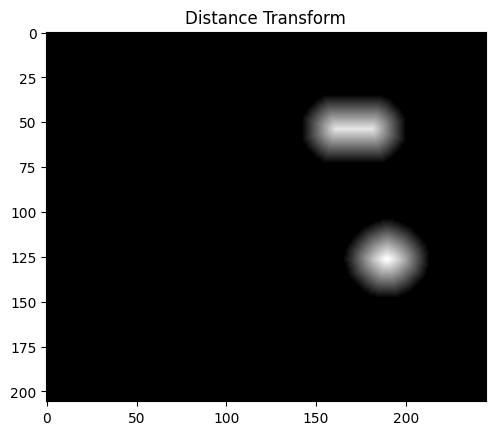

In [55]:
plt.title("Distance Transform")
plt.imshow(dist_transform, cmap='gray')
plt.show()

In [56]:
ret, last_image = cv2.threshold(dist_transform, 0.8*dist_transform.max(), 255, 0)
last_image = np.uint8(last_image)

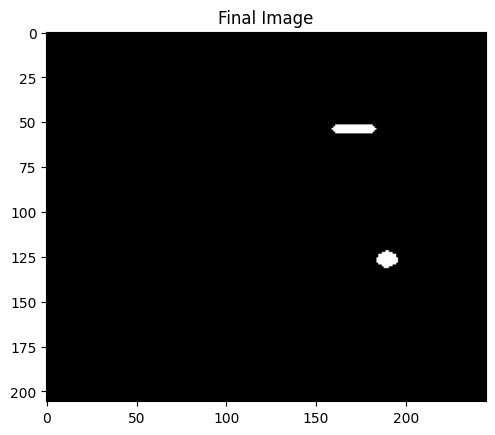

In [57]:
plt.title("Final Image")
plt.imshow(last_image, cmap='gray')
plt.show()

In [58]:
cnt = cv2.findContours(last_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(type(cnt))

<class 'tuple'>


In [59]:
import imutils
cnt2 = imutils.grab_contours(cnt)
print(type(cnt2))

<class 'tuple'>


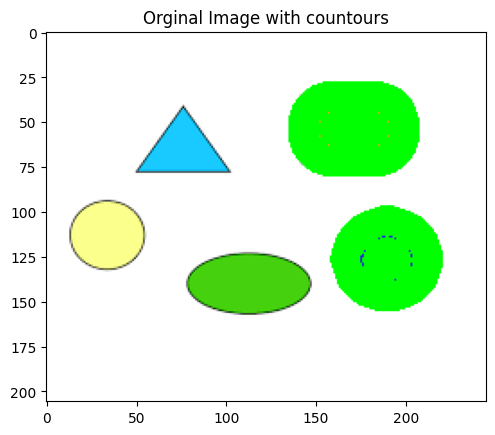

In [60]:
cv2.drawContours(img, cnt2, -1, (0,255,0), 15)
plt.title("Orginal Image with countours")
plt.imshow(img, cmap='gray')

In [61]:
len = len(cnt2)
print("Number of images in image: ", len)

TypeError: 'int' object is not callable